In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from utils.hmatr import Hmatr
from thresh import ThreshAnalytical
from utils.utils import generate_series, find_Q_hat

from matplotlib import rc
rc('font', weight='bold', size=15)
rc('axes', linewidth=1)

Unable to determine R home: [WinError 2] Не удается найти указанный файл
Unable to determine R library path: Command '('D:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.1/Rssa_1.0.4.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2218216 bytes (2.1 MB)

R[write to console]: downloaded 2.1 MB




package 'Rssa' successfully unpacked and MD5 sums checked


R[write to console]: Warning:
R[write to console]:  cannot remove prior installation of package 'Rssa'

R[write to console]: Warning:
R[write to console]:  restored 'Rssa'




The downloaded binary packages are in
	C:\Users\ivank\AppData\Local\Temp\Rtmp4Ge6DN\downloaded_packages


In [69]:
N = 700  # Длина ряда
w1 = 1 / 10  # Начальная частота
Q = 301
r = 2
method = "svd"

w2 = 1/5
C1 = 1
C2 = 2
phi1 = 0
phi2 = np.pi/2
B = 100
T_ = 100
L = 50
noise_sd = 0.5

colors = plt.cm.hsv(np.linspace(0, 1, 10))

# 3

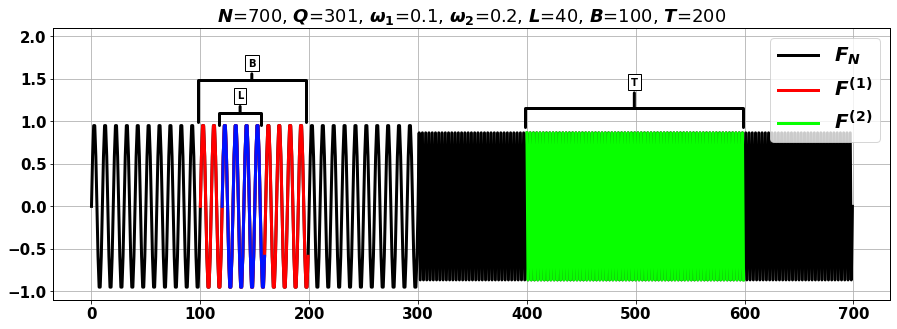

In [68]:



w2 = 1/5

B = 100
T_ = 200
L = 40


original_series = generate_series(w1, 1/3, Q, N)

B_start = 100
X_base = np.arange(B)+B_start
base = original_series[B_start:B_start+B]

T_start = 400
X_test = np.arange(T_)+T_start
test = original_series[T_start:T_start+T_]

L_start = 120
X_l = np.arange(L)+L_start
l_ser = original_series[L_start:L_start+L]

plt.figure(figsize=(15, 5))

plt.annotate('B', xy=(0.237, 0.8), xytext=(0.237, 0.87), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.4, lengthB=4.2', lw=3.0))

plt.annotate('L', xy=(0.223, 0.68), xytext=(0.223, 0.75), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2.1, lengthB=1.2', lw=3.0))

plt.annotate('T', xy=(0.694, 0.7), xytext=(0.694, 0.8), xycoords='axes fraction',
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=10.9, lengthB=1.9', lw=3.0))

plt.rc('legend',fontsize=20, loc='upper right')
plt.plot(original_series, label=r"$F_N$", color='black', linewidth=3)
plt.plot(X_base, base, label=r"$F^{(1)}$", color=colors[0], linewidth=3)
plt.plot(X_test, test, label=r"$F^{(2)}$", color=colors[3], linewidth=3)
plt.plot(X_l, l_ser, color=colors[6], linewidth=3)
plt.title(fr"$N$={N}, $Q$={Q}, $\omega_1$={w1}, $\omega_2$={w2}, $L$={L}, $B$={B}, $T$={T_}")
plt.legend()
plt.legend()
plt.ylim((-1.1, 2.1))
plt.grid()
plt.show()
# designations.png

# 6

In [70]:
seriesPermanent = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w2*n + phi1)
seriesTemporary = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C2*np.sin(2*np.pi*w1*n + phi1)
seriesShifted = lambda n: C1*np.sin(2*np.pi*w1*n + phi1) if n < Q-1 else C1*np.sin(2*np.pi*w1*n + phi2)
seriesOutlier = lambda n: C1*np.sin(2*np.pi*w1*n + phi1)

fPerm = [seriesPermanent(i) for i in range(N)]
hmPerm = Hmatr(fPerm, B, T_, L, neig=r, svdMethod=method)

fTemp = [seriesTemporary(i) for i in range(N)]
hmTemp = Hmatr(fTemp, B, T_, L, neig=r, svdMethod=method)

fShifted = [seriesShifted(i) for i in range(N)]
hmShifted = Hmatr(fShifted, B, T_, L, neig=r, svdMethod=method)

fOutlier = [seriesOutlier(i) for i in range(N)]
fOutlier[Q] = fOutlier[Q] + C1*10
hmOutlier = Hmatr(fOutlier, B, T_, L, neig=r, svdMethod=method)

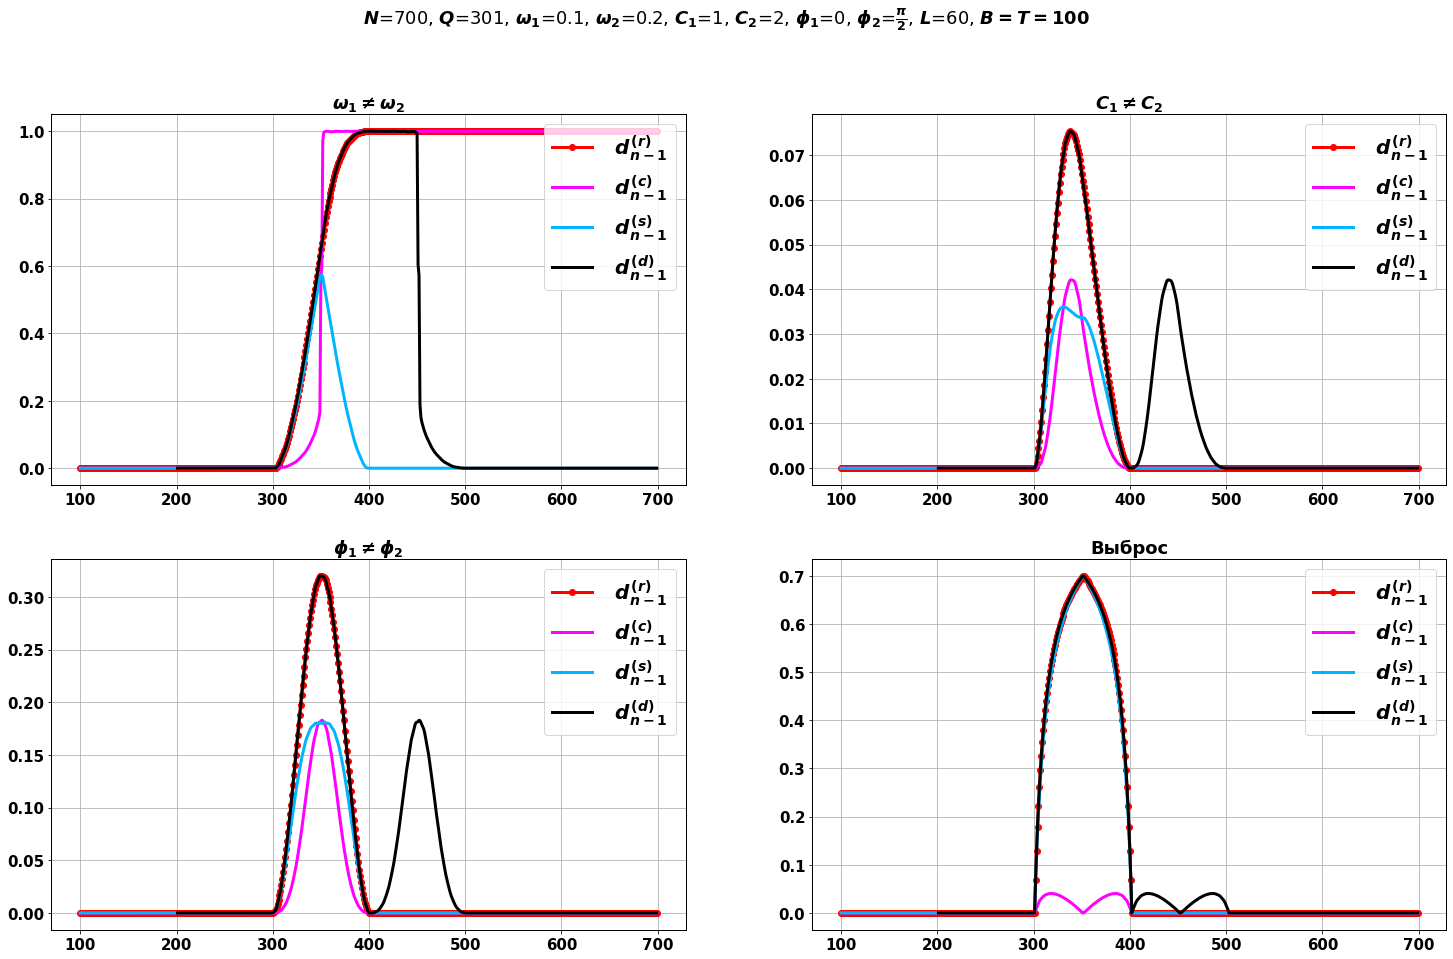

In [74]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 15))
fig.suptitle(r"$N$=700, $Q$=301, $\omega_1$=0.1, $\omega_2$=0.2, $C_1$=1, $C_2$=2, $\phi_1$=0, $\phi_2$=$\frac{\pi}{2}$, $L$=60, $B=T=100$")

ax1.set_title(r'$\omega_1 \neq \omega_2$', fontweight='bold')
ax1.plot(np.arange(hmPerm.T, hmPerm.N), hmPerm.getRow(0), label=r' $d_{n-1}^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax1.plot(np.arange(hmPerm.B, hmPerm.N), hmPerm.getCol(0), label=r' $d_{n-1}^{(c)} $', color='fuchsia', linewidth=3)
ax1.plot(np.arange(hmPerm.T, hmPerm.N), hmPerm.getSym(), label=r' $d_{n-1}^{(s)} $', color=colors[5], linewidth=3)
ax1.plot(np.arange(hmPerm.B + hmPerm.T + 1, hmPerm.N), hmPerm.getDiag(), label=r' $d_{n-1}^{(d)} $', color='black', linewidth=3)
ax1.legend()
ax1.grid()

ax2.set_title(r'$C_1 \neq C_2$', fontweight='bold')
ax2.plot(np.arange(hmTemp.T, hmTemp.N), hmTemp.getRow(0), label=r' $d_{n-1}^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax2.plot(np.arange(hmTemp.B, hmTemp.N), hmTemp.getCol(0), label=r' $d_{n-1}^{(c)} $', color='fuchsia', linewidth=3)
ax2.plot(np.arange(hmTemp.T, hmTemp.N), hmTemp.getSym(), label=r' $d_{n-1}^{(s)} $', color=colors[5], linewidth=3)
ax2.plot(np.arange(hmTemp.B + hmTemp.T + 1, hmTemp.N), hmTemp.getDiag(), label=r' $d_{n-1}^{(d)} $', color='black', linewidth=3)
ax2.legend()
ax2.grid()

ax3.set_title(r'$\phi_1 \neq \phi_2$', fontweight='bold')
ax3.plot(np.arange(hmShifted.T, hmShifted.N), hmShifted.getRow(0), label=r' $d_{n-1}^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax3.plot(np.arange(hmShifted.B, hmShifted.N), hmShifted.getCol(0), label=r' $d_{n-1}^{(c)} $', color='fuchsia', linewidth=3)
ax3.plot(np.arange(hmShifted.T, hmShifted.N), hmShifted.getSym(), label=r' $d_{n-1}^{(s)} $', color=colors[5], linewidth=3)
ax3.plot(np.arange(hmShifted.B + hmShifted.T + 1, hmShifted.N), hmShifted.getDiag(), label=r' $d_{n-1}^{(d)} $', color='black', linewidth=3)
ax3.legend()
ax3.grid()

ax4.set_title('Выброс', fontweight='bold')
ax4.plot(np.arange(hmOutlier.T, hmOutlier.N), hmOutlier.getRow(0), label=r' $d_{n-1}^{(r)} $', color=colors[0], marker='o', linewidth=3)
ax4.plot(np.arange(hmOutlier.B, hmOutlier.N), hmOutlier.getCol(0), label=r' $d_{n-1}^{(c)} $', color='fuchsia', linewidth=3)
ax4.plot(np.arange(hmOutlier.T, hmOutlier.N), hmOutlier.getSym(), label=r' $d_{n-1}^{(s)} $', color=colors[5], linewidth=3)
ax4.plot(np.arange(hmOutlier.B + hmOutlier.T + 1, hmOutlier.N), hmOutlier.getDiag(), label=r' $d_{n-1}^{(d)} $', color='black', linewidth=3)
ax4.legend()
ax4.grid()
# detectionTests.png